In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
n_classes = 3

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re

In [3]:
df = pd.read_csv("../../usa-labelled.csv")
df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,scores,compound,sentiment
0,cher i got my second pfizer vaccine shot may 1...,cher i got my second pfizer vaccine shot may 1...,ENGLISH,cher i got my second pfizer vaccine shot may 1...,"[('cher', 'NN'), ('i', 'NN'), ('got', 'VBD'), ...","['cher', 'get', 'second', 'pfizer', 'vaccine',...","['cher', 'get', 'second', 'pfizer', 'vaccine',...","['cher', 'pfizer', 'vaccine', 'cher', 'guess',...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,Ô£ø√º√≠√¢dp'ed by pfizer april Ô£ø√º√≤√•,syringedp'ed by pfizer april relieved_face,ENGLISH,syringedp'ed by pfizer april relieved_face,"[('syringe', 'NN'), ('ed', 'NN'), ('by', 'IN')...","['syringe', 'ed', 'pfizer', 'april']",['syringe'],['syringe'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,Ô£ø√º√´√ßÔ£ø√º√®¬∫ double shot pfizer,thumbs_upmedium-light_skin_tone double shot pf...,ENGLISH,thumbs_upmedium-light_skin_tone double shot pf...,"[('double', 'RB'), ('shot', 'JJ'), ('pfizer', ...","['double', 'shot', 'pfizer']","['double', 'shot', 'pfizer']","['shot', 'pfizer']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,couple things. my wife has ra. takes plaquenil...,couple things. my wife has ra. takes plaquenil...,ENGLISH,couple things. my wife has ra. takes plaquenil...,"[('couple', 'NN'), ('things', 'NNS'), ('my', '...","['couple', 'thing', 'wife', 'ra', 'take', 'pla...","['couple', 'thing', 'wife', 'take', 'plaquenil...","['couple', 'thing', 'wife', 'plaquenil', 'prob...","{'neg': 0.056, 'neu': 0.887, 'pos': 0.057, 'co...",0.0150,neutral
4,"great, me too back april. pfizer 2 shots","great, me too back april. pfizer 2 shots",ENGLISH,"great, me too back april. pfizer 2 shots","[('great', 'JJ'), ('me', 'PRP'), ('too', 'RB')...","['great', 'back', 'april', 'pfizer', 'two', 's...","['great', 'pfizer', 'shot']","['pfizer', 'shot']","{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,positive
...,...,...,...,...,...,...,...,...,...,...,...
1494,we‚Äö√Ñ√¥re at north high school today until 5...,we‚Äö√Ñ√¥re at north high school today until 5...,ENGLISH,we‚Äö√Ñ√¥re at north high school today until 5...,"[('we', 'PRP'), ('i', 'VBP'), ('re', 'VBP'), (...","['north', 'high_school', 'today', 'come', 'get...","['north', 'today', 'come', 'get', 'free', 'pfi...","['north', 'today', 'pfizer', 'vaccine', 'year'...","{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.5106,positive
1495,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,ENGLISH,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,"[('y', 'NN'), ('i', 'NN'), ('all', 'DT'), ('pl...","['please', 'get', 'vaccinated', 'disclaimer', ...","['get', 'vaccinated', 'disclaimer', 'pfizer', ...","['disclaimer', 'pfizer', 'stock']","{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.3182,positive
1496,disappointed you are blame only unvaccinated c...,disappointed you are blame only unvaccinated c...,ENGLISH,disappointed you are blame only unvaccinated c...,"[('disappointed', 'VBN'), ('you', 'PRP'), ('ar...","['disappointed', 'blame', 'vaccinated', 'crowd...","['disappointed', 'blame', 'vaccinated', 'crowd...","['blame', 'delta', 'covid', 'case', 'vaccine']","{'neg': 0.174, 'neu': 0.727, 'pos': 0.099, 'co...",-0.4753,negative
1497,"be fair, cdc et al have always said pfizer or ...","be fair, cdc et al have always said pfizer or ...",ENGLISH,"be fair, cdc et al have always said pfizer or ...","[('be', 'VB'), ('fair', 'JJ'), ('cac', 'JJ'), ...","['fair', 'cac', 'et_al', 'always', 'say', 'pfi...","['fair', 'cac', 'et_al', 'always', 'say', 'pfi...","['cac', 'et_al', 'pfizer', 'vaccination', 'cha...","{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.5106,positive


In [4]:
# Drop columns not used for modelling
cols_to_drop = ['languages', 'new_text', 'pos_tagged_words','words_processed_all', 'words_processed_noun_adj_verb_adv', 'words_processed_noun', 'scores','compound']
df.drop(cols_to_drop, axis=1, inplace=True)
            

In [5]:
df

,Text,new_text_after_translation,sentiment
0,cher i got my second pfizer vaccine shot may 1...,cher i got my second pfizer vaccine shot may 1...,neutral
1,Ô£ø√º√≠√¢dp'ed by pfizer april Ô£ø√º√≤√•,syringedp'ed by pfizer april relieved_face,neutral
2,Ô£ø√º√´√ßÔ£ø√º√®¬∫ double shot pfizer,thumbs_upmedium-light_skin_tone double shot pf...,neutral
3,couple things. my wife has ra. takes plaquenil...,couple things. my wife has ra. takes plaquenil...,neutral
4,"great, me too back april. pfizer 2 shots","great, me too back april. pfizer 2 shots",positive
...,...,...,...
1494,we‚Äö√Ñ√¥re at north high school today until 5...,we‚Äö√Ñ√¥re at north high school today until 5...,positive
1495,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,positive
1496,disappointed you are blame only unvaccinated c...,disappointed you are blame only unvaccinated c...,negative
1497,"be fair, cdc et al have always said pfizer or ...","be fair, cdc et al have always said pfizer or ...",positive


In [6]:
# Helper function to remove unwanted patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Remove Twitter handles from the data 
df['new_text_after_translation'] = np.vectorize(remove_pattern)(df['new_text_after_translation'], "@[\w]*")

# Remove punctuations, numbers, and special characters
df['new_text_after_translation'] = df['new_text_after_translation'].str.replace("[^a-zA-Z]", " ")

/var/folders/d0/5_1bb8ld291843m4x7vj7vnw0000gn/T/ipykernel_7641/4090771562.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_text_after_translation'] = df['new_text_after_translation'].str.replace("[^a-zA-Z]", " ")


In [7]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
targets = df.sentiment.apply(sentiment2target)

In [8]:
df['sentiment'] =targets

In [9]:
df

,Text,new_text_after_translation,sentiment
0,cher i got my second pfizer vaccine shot may 1...,cher i got my second pfizer vaccine shot may ...,1
1,Ô£ø√º√≠√¢dp'ed by pfizer april Ô£ø√º√≤√•,syringedp ed by pfizer april relieved face,1
2,Ô£ø√º√´√ßÔ£ø√º√®¬∫ double shot pfizer,thumbs upmedium light skin tone double shot pf...,1
3,couple things. my wife has ra. takes plaquenil...,couple things my wife has ra takes plaquenil...,1
4,"great, me too back april. pfizer 2 shots",great me too back april pfizer shots,2
...,...,...,...
1494,we‚Äö√Ñ√¥re at north high school today until 5...,we re at north high school today until ...,2
1495,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,y all please get vaccinated d...,2
1496,disappointed you are blame only unvaccinated c...,disappointed you are blame only unvaccinated c...,0
1497,"be fair, cdc et al have always said pfizer or ...",be fair cdc et al have always said pfizer or ...,2


In [10]:
df['sentiment'].value_counts()

2    643
0    463
1    393
Name: sentiment, dtype: int64

In [11]:
# Plot a funnel chart

plt.style.use('seaborn')
from plotly import graph_objs as go
import plotly.express as px

temp = df.groupby('sentiment').count()['new_text_after_translation'].reset_index()
# temp['label'] = temp['negative'].apply(lambda x : 'Xenophobic Tweet' if x==1 else 'Non Xenophobic Tweet')

# fig = go.Figure(go.Funnelarea(
#     text = temp.label,
#     values = temp.text,
#     title = {"position" : "top center", "text" : "Funnel Chart for target distribution"}
#     ))
# fig.show()


In [12]:
temp

,sentiment,new_text_after_translation
0,0,463
1,1,393
2,2,643


In [13]:
temp['label'] = temp['sentiment'].apply(lambda x : 'Neutral Tweet' if x==1 else ('Positive Tweet' if x == 2 else 'Negative Tweet'))


In [14]:
df

,Text,new_text_after_translation,sentiment
0,cher i got my second pfizer vaccine shot may 1...,cher i got my second pfizer vaccine shot may ...,1
1,Ô£ø√º√≠√¢dp'ed by pfizer april Ô£ø√º√≤√•,syringedp ed by pfizer april relieved face,1
2,Ô£ø√º√´√ßÔ£ø√º√®¬∫ double shot pfizer,thumbs upmedium light skin tone double shot pf...,1
3,couple things. my wife has ra. takes plaquenil...,couple things my wife has ra takes plaquenil...,1
4,"great, me too back april. pfizer 2 shots",great me too back april pfizer shots,2
...,...,...,...
1494,we‚Äö√Ñ√¥re at north high school today until 5...,we re at north high school today until ...,2
1495,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,y all please get vaccinated d...,2
1496,disappointed you are blame only unvaccinated c...,disappointed you are blame only unvaccinated c...,0
1497,"be fair, cdc et al have always said pfizer or ...",be fair cdc et al have always said pfizer or ...,2


In [15]:
X = df
y = X['sentiment']
X.drop(['sentiment'], axis=1, inplace=True)

# Split the data using stratify 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
X_test_stats = X_test.copy()
# Reset the index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train.drop(['Text'], axis=1, inplace=True)
X_test.drop(['Text'], axis=1, inplace=True)


In [16]:
X_test

,new_text_after_translation
0,since april increased cases myocarditis...
1,at st charles county fair st louis suburb ...
2,it s not i m christian but my con...
3,thinking getting third pfizer just so i have g...
4,unfortunately fda has so far only authorized p...
...,...
295,pfizer vaccine is effective against delta...
296,pfizer raises covid vaccine sales fore...
297,j amp j even had stop production before contin...
298,very similar az my first knocked me out w...


In [17]:
X_test_stats

,Text,new_text_after_translation
527,"""since april 2021, increased cases myocarditis...",since april increased cases myocarditis...
390,"""at st. charles county fair, st. louis suburb ...",at st charles county fair st louis suburb ...
245,it‚Äö√Ñ√¥s not. i‚Äö√Ñ√¥m christian but my con...,it s not i m christian but my con...
824,thinking getting third pfizer just so i have g...,thinking getting third pfizer just so i have g...
26,unfortunately fda has so far only authorized p...,unfortunately fda has so far only authorized p...
...,...,...
815,pfizer: vaccine is 88% effective against delta...,pfizer vaccine is effective against delta...
601,pfizer raises 2021 covid-19 vaccine sales fore...,pfizer raises covid vaccine sales fore...
743,j&amp;j even had stop production before contin...,j amp j even had stop production before contin...
1399,very similar. az my first knocked me out 3 4 w...,very similar az my first knocked me out w...


In [18]:
# Convert the text feature into a vectors of tokens
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',
                             lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train.new_text_after_translation)
X_test_cv = cv.transform(X_test.new_text_after_translation)


In [19]:
import scipy.sparse as sp
train_count = sp.csr_matrix(X_train_cv)

In [20]:
X_train = sp.hstack([train_count])

In [21]:
X_train

<1199x4191 sparse matrix of type '<class 'numpy.int64'>'
	with 16685 stored elements in Compressed Sparse Row format>

In [22]:
test_count = sp.csr_matrix(X_test_cv)
X_test = sp.hstack([test_count])

In [23]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
n_classes = 3

clf = SGDClassifier(alpha=1e-3, random_state=19)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [24]:
# Plot scores and make a confusion matrix for non-xenophobic/xenophobic predictions

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_classes = 3

cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
print("Accuracy score ={:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred, average="weighted")*100))
print(f'Number of samples to classify: {len(X_test.toarray())}\n')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
print(f'Confusion matrix: \n{cm}')

Accuracy score =55.33%
F1 score =55.24%
Number of samples to classify: 300

Accuracy score: 0.5533333333333333
Precision Score :  0.5533333333333333
Recall Score :  0.5533333333333333
Confusion matrix: 
[[42 26 25]
 [14 39 25]
 [20 24 85]]


Text(38.32000000000001, 0.5, 'True label')

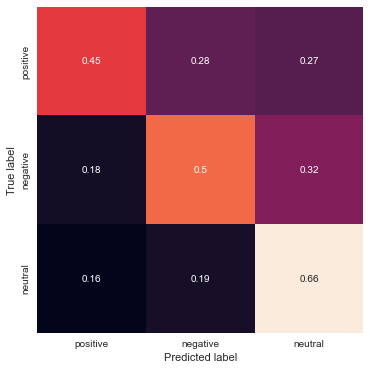

In [25]:
# Normalize the confusion matrix and plot it

labels = ['positive', 'negative', 'neutral']
plt.figure(figsize=(6,6))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, square=True, annot=True, cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [26]:
# Show how the first 50 test tweets were classified and their true label
testing_predictions = []
for i in range(len(X_test.toarray())):
    if y_pred[i] == 0:
        testing_predictions.append('Negative') 
    else:
        if y_pred[i] == 1:
            testing_predictions.append('Neutral')
        else:
            testing_predictions.append('Positive')
check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'text':list(X_test_stats.Text)})
check_df.replace(to_replace=0, value='Negative', inplace=True)
check_df.replace(to_replace=1, value='Neutral', inplace=True)
check_df.replace(to_replace=2, value='Positive', inplace=True)
check_df.iloc[:50]


,actual_label,prediction,text
0,Neutral,Neutral,"""since april 2021, increased cases myocarditis..."
1,Neutral,Positive,"""at st. charles county fair, st. louis suburb ..."
2,Positive,Positive,it‚Äö√Ñ√¥s not. i‚Äö√Ñ√¥m christian but my con...
3,Positive,Positive,thinking getting third pfizer just so i have g...
4,Positive,Positive,unfortunately fda has so far only authorized p...
5,Negative,Negative,"‚Äö√Ñ√∫the vaccine zoetis, animal health compa..."
6,Positive,Positive,thankful have been fully vaccinated with pfize...
7,Positive,Negative,pfizer 90-95% efficacy. airborne droplets. air...
8,Neutral,Neutral,these are side effects that pfizer that pete r...
9,Positive,Positive,pfizer vaccine was significantly more effectiv...


In [27]:
X_test

<300x4191 sparse matrix of type '<class 'numpy.int64'>'
	with 3759 stored elements in Compressed Sparse Row format>

In [28]:
misclassified = check_df[check_df['actual_label'] != check_df['prediction']]

In [29]:
misclassified=misclassified.reset_index()
misclassified

,index,actual_label,prediction,text
0,1,Neutral,Positive,"""at st. charles county fair, st. louis suburb ..."
1,7,Positive,Negative,pfizer 90-95% efficacy. airborne droplets. air...
2,11,Positive,Negative,sorry it‚Äö√Ñ√¥s not vaccine that pfizer state...
3,12,Negative,Neutral,i was slightly tired twenty four hours after m...
4,14,Neutral,Positive,what about delta variant all vaxxed people. so...
...,...,...,...,...
129,293,Positive,Neutral,putting ton faith 2 pfizer vaccine shots &amp;...
130,295,Negative,Positive,pfizer: vaccine is 88% effective against delta...
131,297,Neutral,Negative,j&amp;j even had stop production before contin...
132,298,Neutral,Negative,very similar. az my first knocked me out 3 4 w...


In [34]:
misclassified.iloc[131]['text']

'j&amp;j even had stop production before continuing because side affects. those things worry people. pfizer seems me safest option after what i looked up.'

In [155]:
misclassified.iloc[50:70]

,index,actual_label,prediction,text
50,93,Negative,Neutral,fighting stigma : jury munster child abuse tri...
51,95,Neutral,Positive,this can‚Äö√Ñ√¥t be real.Ô£ø√º√´√Ñ right #covi...
52,97,Positive,Neutral,thinking about getting third pfizer shot i‚Äö√...
53,98,Neutral,Positive,last child fully vaxxed. believe they are stil...
54,100,Neutral,Negative,#covid19 update triple mask mandate coming. un...
55,102,Positive,Neutral,i was curious since i am 6 months post 2nd dos...
56,105,Neutral,Negative,6 fully vaccinated people who attended outdoor...
57,108,Negative,Neutral,meanwhile i just seen tiktok video someone who...
58,111,Negative,Neutral,pfizer will have full auth month so not surpri...
59,118,Positive,Negative,if anyone 12+ needs 1st or 2nd dose pfizer tod...
